In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


Bad key savefig.frameon in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an 

### Load Data

In [3]:
data = pd.read_csv("./data.csv")

In [4]:
X, y = data.drop(["class"], axis=1).values, data["class"].values

In [5]:
del data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y_ohe = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.33, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((114294, 2025), (56295, 2025), (114294, 15), (56295, 15))

In [10]:
del y_ohe, X, y

In [11]:
X_train = X_train.reshape((-1, 45, 45, 1))
X_test = X_test.reshape((-1, 45, 45, 1))

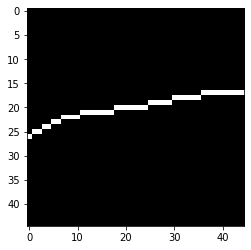

In [12]:
plt.imshow(X_train[0][..., 0], cmap="gray")
plt.show()

In [13]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation="relu", input_shape=(45,45,1)))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 8, kernel_size = (8, 8), activation="relu"))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=15, activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 41, 41, 4)         104       
_________________________________________________________________
average_pooling2d_1 (Average (None, 20, 20, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         2056      
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                4335      
Total params: 6,495
Trainable params: 6,495
Non-trainable params: 0
____________________________________________________

In [19]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=500)

Train on 114294 samples, validate on 56295 samples
Epoch 1/500
114294/114294 [==============================] - 35s 306us/step - loss: 0.3339 - acc: 0.9104 - val_loss: 0.1467 - val_acc: 0.9629
Epoch 2/500
114294/114294 [==============================] - 14s 123us/step - loss: 0.1250 - acc: 0.9674 - val_loss: 0.1238 - val_acc: 0.9665
Epoch 3/500
114294/114294 [==============================] - 14s 122us/step - loss: 0.0986 - acc: 0.9738 - val_loss: 0.0895 - val_acc: 0.9778
Epoch 4/500
114294/114294 [==============================] - 14s 123us/step - loss: 0.0838 - acc: 0.9784 - val_loss: 0.0845 - val_acc: 0.9783
Epoch 5/500
114294/114294 [==============================] - 14s 123us/step - loss: 0.0742 - acc: 0.9808 - val_loss: 0.0723 - val_acc: 0.9819
Epoch 6/500
114294/114294 [==============================] - 13s 110us/step - loss: 0.0657 - acc: 0.9831 - val_loss: 0.0734 - val_acc: 0.9815
Epoch 7/500
114294/114294 [==============================] - 14s 124us/step - loss: 0.0607 - acc:

KeyboardInterrupt: 

In [20]:
model.save("./Model.h5")